In [1]:
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()


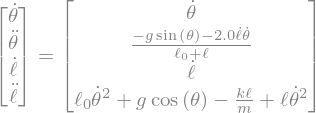

In [2]:
# define our symbolic variables
m, g, k, ell_0, t = symbols('m g k ell_0 t')

# dynamic symbols have implicit dependence on time
theta, ell = dynamicsymbols('theta ell')

# take time derivatives
theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)
ell_dot = diff(ell, t)
ell_ddot = diff(ell_dot, t)

# define our kinetic, potential energy, and Lagrangian
T = 1/2*m*(ell_dot**2 + (ell_0+ell)**2*theta_dot**2)
V = 1/2*k*ell**2 - m*g*(ell_0+ell)*cos(theta)
L = T - V

# solve the Euler-Lagrange Equations
eqn_1 = diff( diff(L,theta_dot), t) - diff(L, theta)
eqn_2 = diff( diff(L,ell_dot), t) - diff(L, ell)
sln = solve([eqn_1, eqn_2], [theta_ddot, ell_ddot])

# show the solution
f = Matrix([theta_dot, sln[theta_ddot], ell_dot, sln[ell_ddot]])
f = simplify(f)
x = Matrix([theta, theta_dot, ell, ell_dot])
x_dot = diff(x,t)

Eq(x_dot, f)

In [3]:
# write each row of f in ASCII text, suitable for inclusion in simulation code
g = f.subs({theta: 'theta', theta_dot: 'theta_dot', ell: 'ell', ell_dot: 'ell_dot'})
for i in range(4):
    print('f[{}] = {}'.format(i, g[i]))

f[0] = theta_dot
f[1] = (-2.0*ell_dot*theta_dot - g*sin(theta))/(ell + ell_0)
f[2] = ell_dot
f[3] = -ell*k/m + ell*theta_dot**2 + ell_0*theta_dot**2 + g*cos(theta)
